# Text Generation with LSTM - Predicting Next Words in a Given Text Sequence

## Import Libraries

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

## Read Data and Preprocess

In [2]:
tokenizer = Tokenizer()

# Upload the text file 
data = open('./sonnets.txt').read()


In [3]:
data

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

In [4]:
# Split on newline and conver to lower case
corpus = data.lower().split("\n")
corpus

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery, so gazed on now,",
 "will be a tatter'd weed, of small worth held:",
 "then being ask'd where all thy beauty lies,",
 'where all the treasure of thy lusty days,',
 'to say, within thine own deep-sunken eyes,',

### Tokenize to get Word Indices

In [5]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [6]:
tokenizer.word_index

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'it': 28,
 'this': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'or': 36,
 'no': 37,
 'then': 38,
 'have': 39,
 'what': 40,
 'are': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'time': 48,
 'will': 49,
 'they': 50,
 'beauty': 51,
 'nor': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'should': 61,
 'thine': 62,
 'now': 63,
 'where': 64,
 'make': 65,
 'one': 66,
 'hath': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [7]:
total_words

3211

In [8]:
tokenizer.word_index.items()

dict_items([('and', 1), ('the', 2), ('to', 3), ('of', 4), ('my', 5), ('i', 6), ('in', 7), ('that', 8), ('thy', 9), ('thou', 10), ('with', 11), ('for', 12), ('is', 13), ('love', 14), ('not', 15), ('but', 16), ('a', 17), ('me', 18), ('thee', 19), ('so', 20), ('be', 21), ('as', 22), ('all', 23), ('you', 24), ('his', 25), ('which', 26), ('when', 27), ('it', 28), ('this', 29), ('by', 30), ('your', 31), ('doth', 32), ('do', 33), ('from', 34), ('on', 35), ('or', 36), ('no', 37), ('then', 38), ('have', 39), ('what', 40), ('are', 41), ('if', 42), ('more', 43), ('mine', 44), ('their', 45), ('shall', 46), ('sweet', 47), ('time', 48), ('will', 49), ('they', 50), ('beauty', 51), ('nor', 52), ('eyes', 53), ('art', 54), ('her', 55), ('heart', 56), ('yet', 57), ('o', 58), ('than', 59), ('can', 60), ('should', 61), ('thine', 62), ('now', 63), ('where', 64), ('make', 65), ('one', 66), ('hath', 67), ('he', 68), ('fair', 69), ('still', 70), ('how', 71), ('eye', 72), ('him', 73), ('like', 74), ('true', 75)

In [9]:
# corpus[0] is the following sentence 
# "from fairest creatures we desire increase"
line=corpus[0]
tokenizer.texts_to_sequences([line])[0]

[34, 417, 877, 166, 213, 517]

### Create a Sequence of N-grams from the words of each sentence

In [10]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [11]:
input_sequences

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

### Apply Padding

In [12]:
# Pad sequences 
# Find the length of the maximum lengh sequence
max_sequence_len = max([len(x) for x in input_sequences])
# Pad to make equal lengh sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


In [13]:
input_sequences 

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]], dtype=int32)

### Make Input/Output Pairs for Training and Testing

In [14]:
# IMPORTANT.....get the input and output/label patterns from the body of texts/sequences
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

In [15]:
predictors

array([[   0,    0,    0, ...,    0,    0,   34],
       [   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       ...,
       [   0,    0,    0, ..., 3209,  493,  493],
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15]], dtype=int32)

In [16]:
label

array([ 417,  877,  166, ..., 3210,   15,   14], dtype=int32)

### One-Hot Encode the Labels

In [17]:
# Convert labels to one-hot-encoded vectors
label = ku.to_categorical(label, num_classes=total_words)

In [18]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Build the ANN Model

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(2*total_words, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 6422)              648622    
                                                                 
 dense_3 (Dense)             (None, 3211)              20624253  
                                                      

## Train the Model

In [22]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 18s 26ms/step - loss: 6.8614 - accuracy: 0.0233
Epoch 2/100
484/484 [==============================] - 13s 26ms/step - loss: 6.5105 - accuracy: 0.0232
Epoch 3/100
484/484 [==============================] - 13s 27ms/step - loss: 6.3872 - accuracy: 0.0276
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2618 - accuracy: 0.0317
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1663 - accuracy: 0.0365
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0686 - accuracy: 0.0412
Epoch 7/100
484/484 [==============================] - 13s 27ms/step - loss: 5.9647 - accuracy: 0.0445
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8375 - accuracy: 0.0512
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.7164 - accuracy: 0.0560
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

## Plot Training Accuracy and Loss

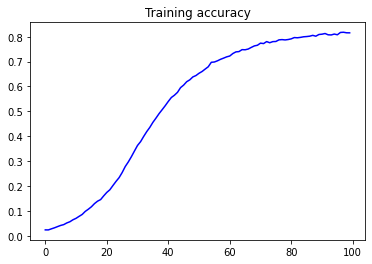

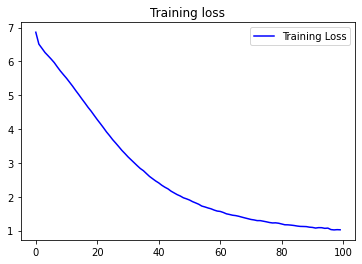

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Save the Model in a Disk File

In [24]:
model_json = model.to_json()

In [25]:
# Save model architecture
with open("TextGen_model.json", "w") as json_file:
    json_file.write(model_json)

In [26]:
# Save model weights
model.save_weights("TextGen_model.h5")

## Load the Model from a Disk File

In [27]:
# loading the model 
from tensorflow.keras.models import model_from_json

# Load the model architecture
json_file = open('TextGen_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

In [28]:
# Initialize the model with the pre-trained weights

loaded_model.load_weights("TextGen_model.h5")

## Predict next 100 Words

In [30]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = loaded_model.predict(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == np.argmax(predicted):
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope name tell a slow words stay be hammer'd steel it can bear afford woe prove thee lie still to set truth and loss to true ' tell no rude stronger than a hot too slow inconstant youth be shown dead spent hour bright ' bear youth alone quite bear hence bear days bear desired change from true age give crime dead remain set good child exchanged mother light light quite gone on thy chief desire end bear youth be taken torn alone decrease taken keep another youth be his frame pride more esteem'd check youth doth set dead cold light
